<a href="https://colab.research.google.com/github/Tawanss/text-analytic-/blob/main/Copy_of_Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [6]:
from IPython.lib.display import YouTubeVideo

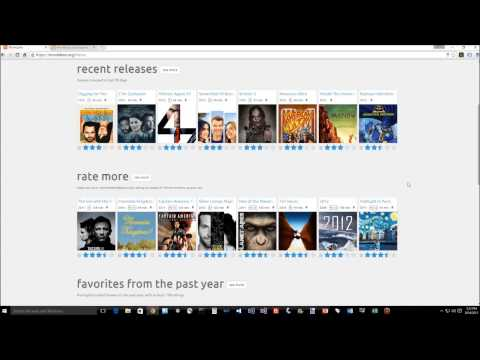

In [7]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. <name> <id>
2. <name> <id>
3. <name> <id>
4. <name> <id>
5. <name> <id>

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [8]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [9]:
import pandas as pd

In [10]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need

users_header = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_table("/content/drive/MyDrive/data warehouse/users.dat", sep="::", header=None,names= users_header )

ratings_header = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_table("/content/drive/MyDrive/data warehouse/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')

movies_header = ['MovieID', 'Title', 'Genres']
movies = pd.read_table("/content/drive/MyDrive/data warehouse/movies.dat", sep="::" , header=None, names= movies_header, encoding ='latin-1') #utf-8 error something so....

#-------------------------------
# Merge data
movies_ratings = ratings.merge(users, how = 'left', on = 'UserID').merge(movies, how = 'left', on = 'MovieID')

#-------------------------------
# Create a HDF5
movies_ratings.to_hdf("/content/drive/MyDrive/data warehouse/movies_rating", key="dfKey0")



<ipython-input-10-f246faa0c70b>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table("/content/drive/MyDrive/data warehouse/users.dat", sep="::", header=None,names= users_header )
<ipython-input-10-f246faa0c70b>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("/content/drive/MyDrive/data warehouse/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')
<ipython-input-10-f246faa0c70b>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s

In [11]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#-------------------------------
# Reading a HDF5
movieDf = pd.read_hdf("/content/drive/MyDrive/data warehouse/movies_rating", key="dfKey0")

In [14]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [15]:
movies_ratings

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [16]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [17]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [18]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [19]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [20]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------





In [21]:
len(set(movieDf['MovieID']))

3706

In [22]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [23]:
#How many movies have an average rating over 4.5 overall?
avg_rating = (movieDf.groupby('Title', as_index=False)).agg({'Rating' : 'mean'})
avg_rating[avg_rating['Rating'] >= 4.5].count()

Title     29
Rating    29
dtype: int64

In [24]:
mean_rating = movieDf.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean').reset_index()

In [25]:
mean_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   3706 non-null   object 
 1   F       3481 non-null   float64
 2   M       3671 non-null   float64
dtypes: float64(2), object(1)
memory usage: 87.0+ KB


In [26]:
mean_rating[mean_rating['F'] >= 4.5]['F'].count()

70

In [27]:
mean_rating[mean_rating['M'] >= 4.5]['M'].count()

29

In [28]:
#How many movies have an average rating over 4.5 among men?
M_rating = movieDf[movieDf['Gender'] == "M"]
M_avg = M_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
M_avg[M_avg['Rating'] >= 4.5]

,Title,Rating
171,Angela (1995),5.000000
196,"Apple, The (Sib) (1998)",4.600000
246,"Baby, The (1973)",5.000000
339,"Bells, The (1926)",5.000000
579,"Callejón de los milagros, El (1995)",4.500000
834,Dangerous Game (1993),5.000000
988,Dry Cleaning (Nettoyage à sec) (1997),4.500000
1191,Follow the Bitch (1998),5.000000
1196,For All Mankind (1989),4.583333
1283,"Gate of Heavenly Peace, The (1995)",5.000000


In [29]:
#How about women?
F_rating = movieDf[movieDf['Gender'] == "F"]
F_avg = F_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
F_avg[F_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 18 to 3453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   70 non-null     object 
 1   Rating  70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [30]:
#How many movies have an median rating over 4.5 among men over age 30? #How about women over age 30?
M30_rating = M_rating[M_rating['Age'] > 30]
M30_avg = M30_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
M30_avg[M30_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 151 to 3532
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   42 non-null     object 
 1   Rating  42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1008.0+ bytes


In [31]:
#How about women over age 30?
F30_rating = F_rating[F_rating['Age'] > 30]
F30_avg = F30_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
F30_avg[F30_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 17 to 3264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   93 non-null     object 
 1   Rating  93 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [32]:
import matplotlib.pyplot as plt

In [33]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

movieDf


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [34]:
#Plot a histogram of the ratings of all movies.
grouped_ratings = movieDf.groupby('Title')


(array([ 56174.,      0., 107557.,      0.,      0., 261197.,      0.,
        348971.,      0., 226310.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

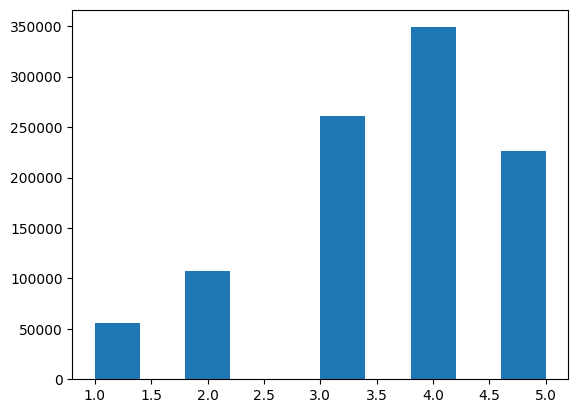

In [35]:
plt.hist(movieDf["Rating"])

Text(0, 0.5, 'Frequency')

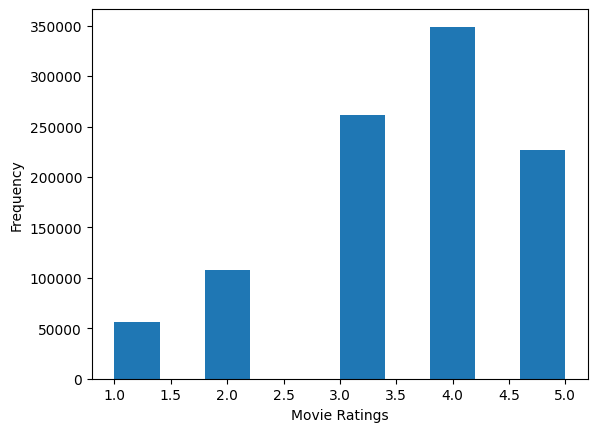

In [36]:
plt.hist(movieDf["Rating"])
plt.xlabel('Movie Ratings')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

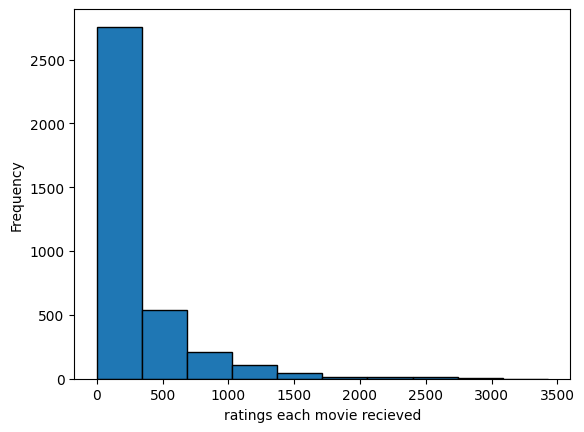

In [37]:
#Plot a histogram of the number of ratings each movie recieved.
tt = movieDf[['Title','Rating']]
tt
data_nb_of_rating = tt.groupby('Title').count().sort_values(by='Rating')
plt.hist(data_nb_of_rating,edgecolor='black')
plt.xlabel('ratings each movie recieved')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

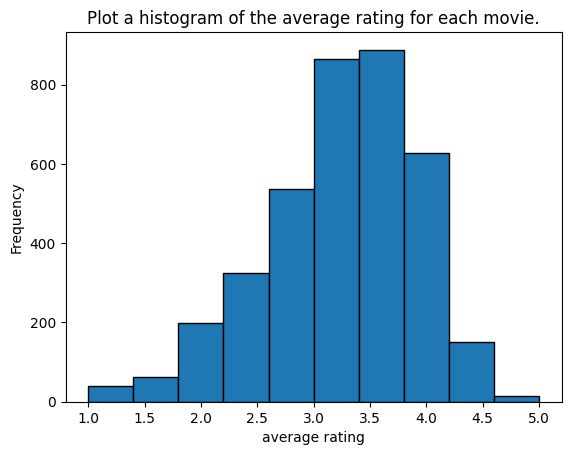

In [38]:
#Plot a histogram of the average rating for each movie.
plt.hist(movieDf.groupby('Title')["Rating"].mean(),edgecolor='black')
plt.title('Plot a histogram of the average rating for each movie.')
plt.xlabel('average rating')
plt.ylabel('Frequency')

In [39]:
#Plot a histogram of the average rating for movies which are rated more than 100 times.
mean = movieDf.groupby('Title')["Rating"].mean()
mean

Title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: Rating, Length: 3706, dtype: float64

In [40]:
df_mean = mean.to_frame(name='mean_rate')

In [41]:
count = tt.groupby('Title').count()
count

,Rating
Title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [42]:
newdf = df_mean.merge(count, how='right',on="Title").reset_index()

In [43]:
newdf

,Title,mean_rate,Rating
0,"$1,000,000 Duck (1971)",3.027027,37
1,'Night Mother (1986),3.371429,70
2,'Til There Was You (1997),2.692308,52
3,"'burbs, The (1989)",2.910891,303
4,...And Justice for All (1979),3.713568,199
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793,29
3702,Zero Effect (1998),3.750831,301
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,2
3704,Zeus and Roxanne (1997),2.521739,23


In [44]:
ratingmore100 = newdf[newdf['Rating'] > 100]

(array([  7.,  34.,  83., 140., 228., 317., 396., 432., 286.,  83.]),
 array([1.46666667, 1.77605096, 2.08543524, 2.39481953, 2.70420382,
        3.01358811, 3.3229724 , 3.63235669, 3.94174098, 4.25112527,
        4.56050955]),
 <BarContainer object of 10 artists>)

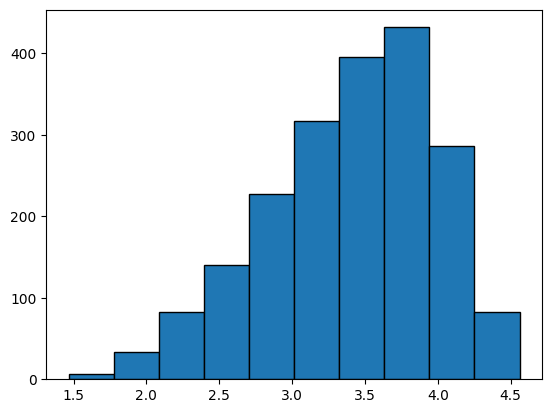

In [45]:
plt.hist(ratingmore100['mean_rate'], edgecolor='black')

In [46]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [99]:
mean_oc = movieDf.pivot_table('Rating', index = 'Occupation', aggfunc= 'mean').dropna().reset_index()

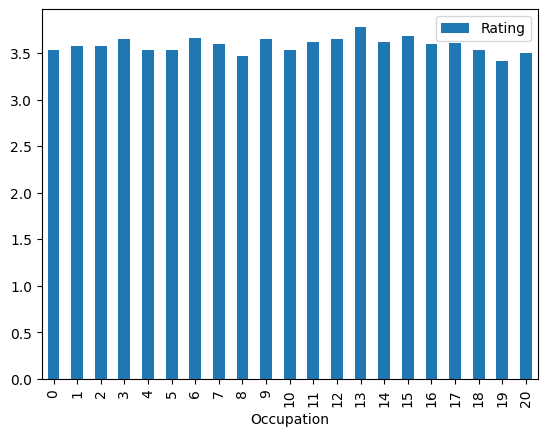

In [100]:
bar_oc = mean_oc.plot.bar(x='Occupation',y='Rating')

In [101]:
mean_age = movieDf.pivot_table('Rating', index = 'Age', aggfunc= 'mean').dropna().reset_index()

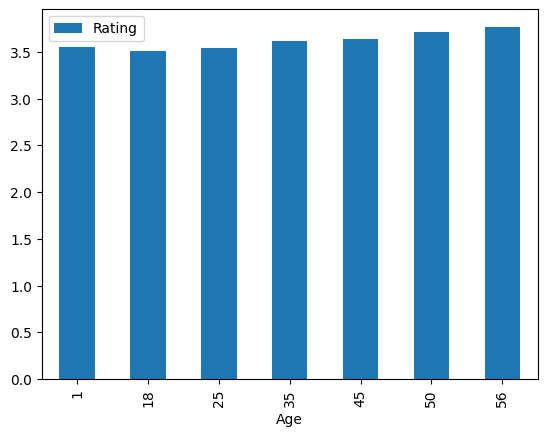

In [102]:
bar_age = mean_age.plot.bar(x='Age',y='Rating')

In [112]:
movie_select = movieDf[['Age','Rating']]


In [122]:
movie_select

,Age,Rating
0,1,5
1,1,3
2,1,3
3,1,4
4,1,5
...,...,...
1000204,25,1
1000205,25,5
1000206,25,5
1000207,25,4


In [140]:
movie_select[movie_select['Age']==1]

,Age,Rating
0,1,5
1,1,3
2,1,3
3,1,4
4,1,5
...,...,...
994629,1,4
994630,1,1
994631,1,1
994632,1,5


In [145]:
movie_select[movie_select['Age']==1].value_counts('Rating')[1]

8.224615045386056

In [146]:
movie_select[movie_select['Age']==1].value_counts('Rating')[2]/27211*100

10.96247840946676

In [147]:
movie_select[movie_select['Age']==1].value_counts('Rating')[3]/27211*100

23.4464003527985

In [148]:
movie_select[movie_select['Age']==1].value_counts('Rating')[4]/27211*100

32.36926243063467

In [149]:
movie_select[movie_select['Age']==1].value_counts('Rating')[5]/27211*100

24.997243761714014

In [160]:
def percent_rating(df, age):
  rating_percent = [100* (df[df['Age']== age ].value_counts('Rating')[i])/len(df[df['Age']== age]) for i in range(1,6)]
  return rating_percent

In [163]:
age_list = [1, 18, 25, 35, 45, 50, 56]

In [165]:
rating_age = [percent_rating(movieDf, age) for age in age_list]

In [168]:
rating_age

[[8.224615045386058,
  10.96247840946676,
  23.446400352798502,
  32.36926243063467,
  24.997243761714014],
 [7.117404759829134,
  12.026523406852062,
  25.935511289338333,
  32.82244355330834,
  22.09811699067213],
 [6.041622425143342,
  11.33012771895762,
  26.364661388020913,
  34.590298213148074,
  21.673290254730052],
 [4.55621272041125,
  10.177233509042578,
  26.62773928031236,
  36.17181650527881,
  22.466997984955],
 [4.07614219267514,
  10.08812310929896,
  26.677268542321812,
  36.27037174321141,
  22.888094412492677],
 [4.0667678300455234,
  8.267347220306249,
  25.472478962615533,
  36.5346944406125,
  25.658711546420196],
 [3.999484270242393,
  7.738525012893244,
  23.62815884476534,
  36.86694172253739,
  27.76689014956163]]

In [188]:
ra = pd.DataFrame(rating_age, columns = range(1,6), dtype = float)
ra

,1,2,3,4,5
0,8.224615,10.962478,23.446400,32.369262,24.997244
1,7.117405,12.026523,25.935511,32.822444,22.098117
2,6.041622,11.330128,26.364661,34.590298,21.673290
3,4.556213,10.177234,26.627739,36.171817,22.466998
4,4.076142,10.088123,26.677269,36.270372,22.888094
5,4.066768,8.267347,25.472479,36.534694,25.658712
6,3.999484,7.738525,23.628159,36.866942,27.766890


In [237]:
ra['Age'] = age_list


In [238]:
ra=ra.reindex(columns=['Age', 1, 2,3,4,5])

In [245]:
ra = ra.reset_index(drop=True)
ra

,Age,1,2,3,4,5
0,1,8.224615,10.962478,23.446400,32.369262,24.997244
1,18,7.117405,12.026523,25.935511,32.822444,22.098117
2,25,6.041622,11.330128,26.364661,34.590298,21.673290
3,35,4.556213,10.177234,26.627739,36.171817,22.466998
4,45,4.076142,10.088123,26.677269,36.270372,22.888094
5,50,4.066768,8.267347,25.472479,36.534694,25.658712
6,56,3.999484,7.738525,23.628159,36.866942,27.766890


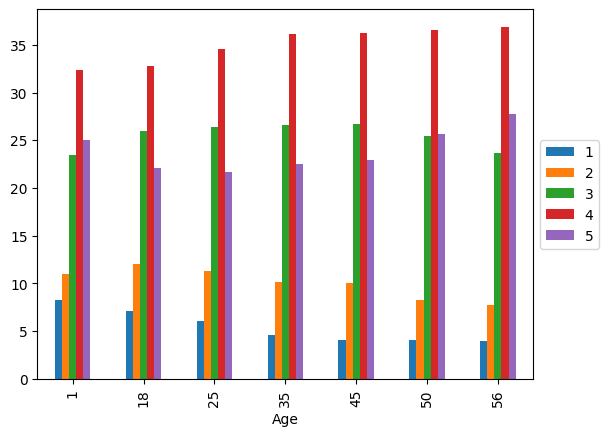

In [273]:
ra_plot = ra.plot(x="Age", y=[1,2,3,4,5], kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### rating การให้คะแนนของ writer

NameError: ignored

### A scatter plot of men versus women and their mean rating for every movie

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
rating_by_title = movieDf.groupby('Title').count()




In [ ]:
rating_by_title = movieDf.groupby('Title').count()

In [ ]:
rating_by_title

### The correlation coefficent between the ratings of men and women

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**